# Intro

### 새로운 데이터를 직면했을 때
  - Feature utility metric으로 Most Useful한 Feature를 찾아 적은 변수로 모델링 해보기
  - 이러한 Feature utility metric을 Mutual Information이라고 한다.
  - 상관관계는 그저 선형적인 관계만 탐지하나, Mutual Information은 그 이상을 확인 할 수 있다.
  

### Mutual Information의 장점
 - 해석이 용이
 - 효율적인 분석가능
 - 오버피팅이 쉽게 되지 않음 (일반화성능 good)
 - 새로운 유형의 관계를 발견가능

# Mutual Information

### SalesPrice의 변화에 대해 가장 많은 영향을 주는 변수는 무엇일까?
 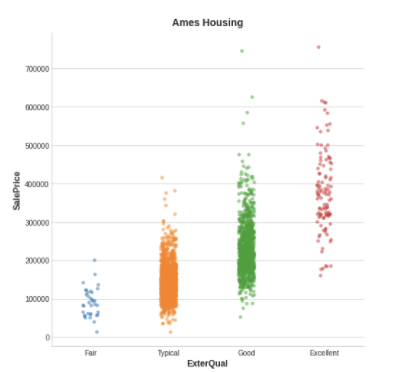
 - Fair가 가장 영향을 덜 주고, Typical이나 Good이 가장 영향을 많이 주는 듯 하다.
 - 여기서 의미하는 것은 Typical과 Good이 SalesPrice를 더 Certain하게 표현한다.

### Uncertainty = Entropy (=불확실성)
 - 많은 질문을 하면 우리가 특정한 것에 대해 잘 알 수 있다. 즉, 좋은 Feature를 보유함은, 많은 질문을 내포한 무기를 의미하며 이는 종속변수라는 것을 Certain하게 만들어준다
 
### 특징
 - 최소값: 0 (아무 관계 없음 (=독립적))
 - 최대값: 무한대 (2이상인 경우는 거의 없음)
 - 잠재적 Target과 연관성을 알게 해준다.
 - 변수 하나만으로 informative할 수도 있지만 거의 다른 변수와 힘을 합쳐 informative 해진다.
   - 그러나Mutual Information은 일변량적인 Feature로 변수간 Interaction은 측정 불가
 - MI가 높다고 모든 것을 할 수 있는 것은 아니며, 모델에 따라 이는 변하기도 한다. 일단 MI가 높으면 Feature를 변환해보자!

# 실습1

In [6]:
# 데이터 불러오기
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("seaborn-whitegrid")

df = pd.read_csv("./data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [7]:
X = df.copy()
y = X.pop("price")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
X.dtypes == int64

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [44]:
# X, y Split
X = df.copy()
y = X.pop("price")
[pd.api.types.is_integer_dtype(t) for t in X.dtypes]
# 데이터 타입이 object인 것에 대하여 LabelEncoding (MI는 Object나 Categorical 타입을 읽지 못하기 떄문)
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() # 5가지면 각각 0~4로 mapping해줌

    
# 한번 더 체킹
discrete_features = X.dtypes == int

discrete_features


'''
discrete_features = X.dtypes == int
discrete_features

위 코드를 실시하는 이유가 무엇일까? 무엇을 검토하지..? 내 생각은 =='object'가 아닌가,,
[pd.api.types.is_integer_dtype(t) for t in X.dtypes] <-- 요것으로 넣어야 할듯? ==int는 int64를 구분하지 못하기 떄문
[t == 'int64' for t in X.dtypes] 위 결과랑 동일한 코드
그리고 label-encoding을 했는데 discrete_feature를 정의해주는 이유는 뭘까?
object -- 원래는 onehotencoding을 해야하나, labelencoding을 해주어서??
'''

"\ndiscrete_features = X.dtypes == int\ndiscrete_features\n\n위 코드를 실시하는 이유가 무엇일까? 무엇을 검토하지..? 내 생각은 =='object'가 아닌가,,\n[pd.api.types.is_integer_dtype(t) for t in X.dtypes] <-- 요것으로 넣어야 할듯? ==int는 int64를 구분하지 못하기 떄문\n그리고 label-encoding을 했는데 discrete_feature를 정의해주는 이유는 뭘까?\nobject -- 원래는 onehotencoding을 해야하나, labelencoding을 해주어서??\n"

- mutual_info_regression: 종속변수가 Continuous
- mutual_info_classf : 종속변수가 Categorical

In [36]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # 3개 간격으로 출력

curb_weight          0.913205
highway_mpg          0.882573
length               0.608680
fuel_system          0.466377
drive_wheels         0.332645
symboling            0.233893
compression_ratio    0.092080
fuel_type            0.048120
Name: MI Scores, dtype: float64

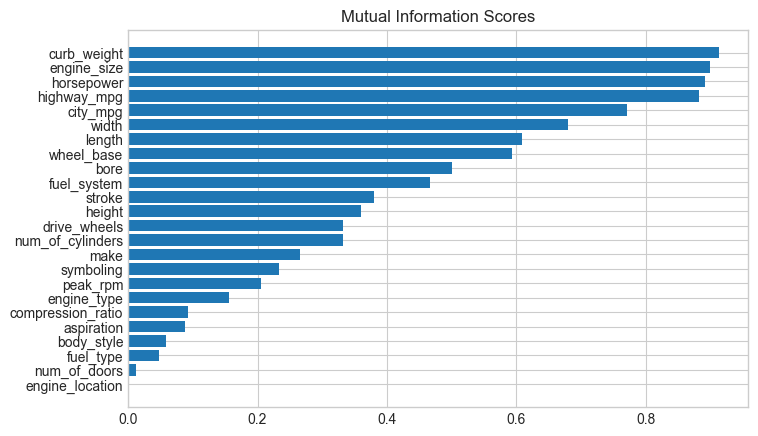

In [37]:
# 시각화
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores) # barh는 가로로 누운 막대그래프 (y, values)
    plt.yticks(width, ticks) # (y, values)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

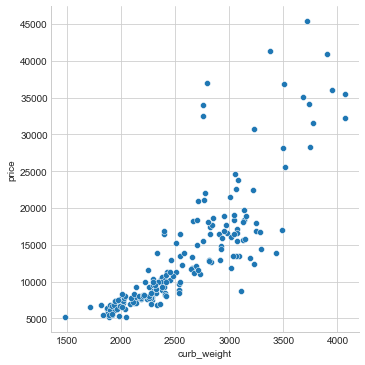

In [39]:
# MI 1등인 curb_weight plotting (강한 상관관계를 볼 수 있음)
sns.relplot(x="curb_weight", y="price", data=df);

##### MI가 낮은 fuel_type을 horsepower와 함께 lmplot
 - 결과적으로, 두 변수를 같이 활용하니 price에 유의미한 영향을 끼칠 수 있는 것을 볼 수 있다.
 - 도메인 지식 활용: 연료종류와 마력의 결합 --> 가격에 영향!

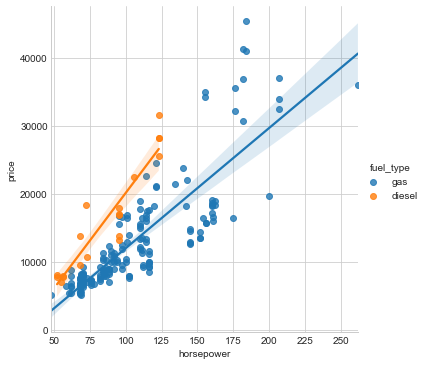

In [40]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)

# 실습2

In [1]:
# Setup feedback system
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
df = pd.read_csv("./data/ames.csv")


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes] # dtype이 integer인 것만 불러오기
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

##### plotting graph
 - MI: YearBuilt > MoSold > ScreenPorch

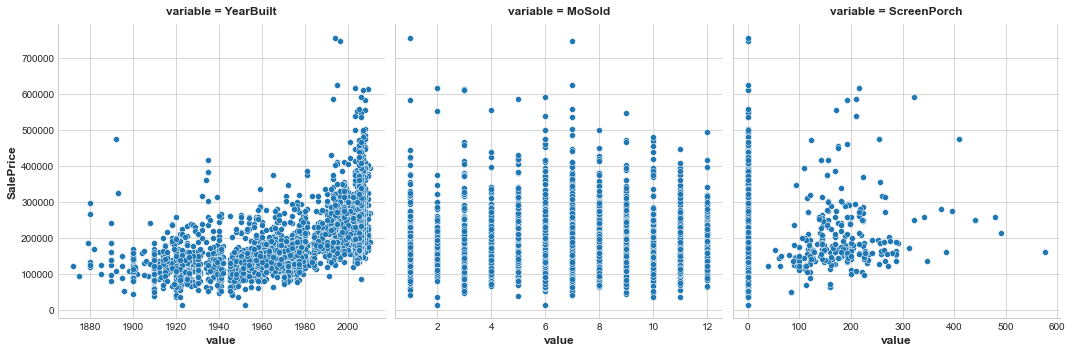

In [3]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False), # facet_kws=dict(sharex=False): x축 공유여부에 대한 파라미터
)

##### plotting2: barh

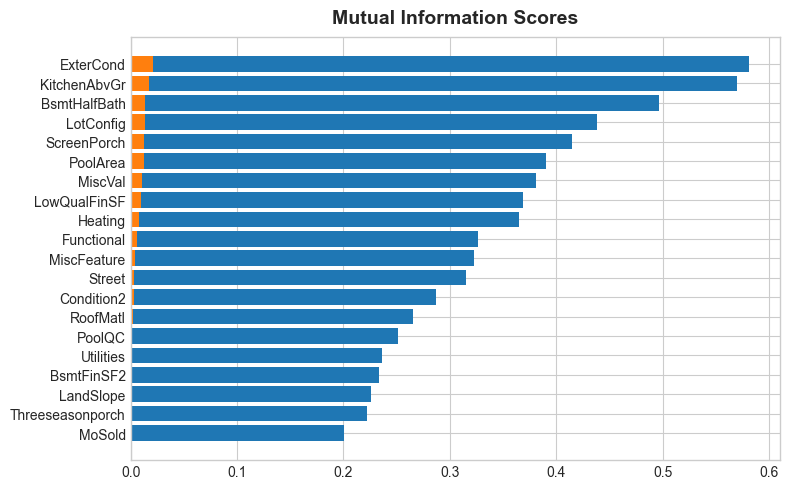

In [5]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
plot_mi_scores(mi_scores.tail(20))

In [8]:
'''
BldgType: MI 50등 순위 --> Plotting 결과 Salesprice의 분포가 균일했음.
이는 잘 구분을 못한다는 것.

그러나 BldgType(거주형태)는 Salesprice에 상식적으로 어느정도 영향을 끼칠 것.

MoSold 및 GrLivArea와 함께 생각해보자


BldgType(거주형태)
  1Fam    Single-family Detached    
  2FmCon    Two-family Conversion; originally built as one-family dwelling
  Duplx    Duplex
  TwnhsE    Townhouse End Unit
  TwnhsI    Townhouse Inside Unit
'''


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

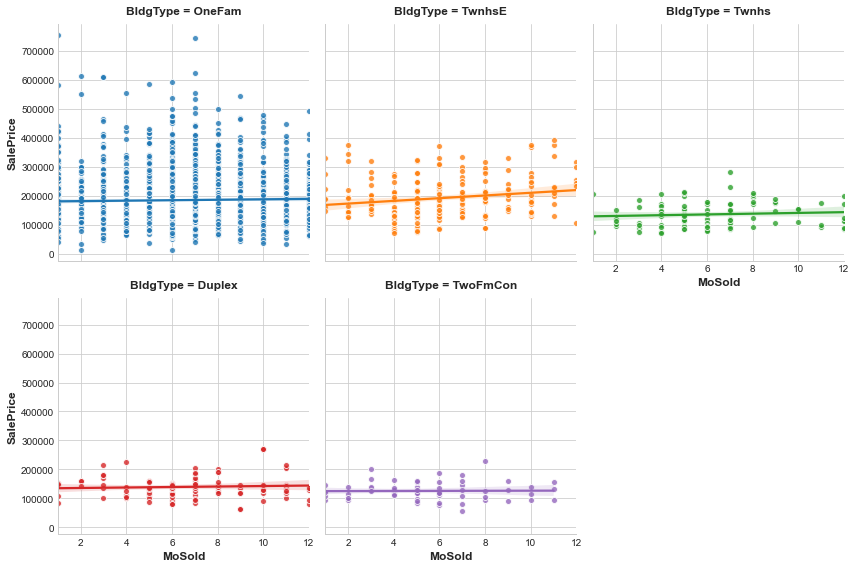

In [9]:
# MoSold와 결합시도 --> 이는 큰 변화가 안보임
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

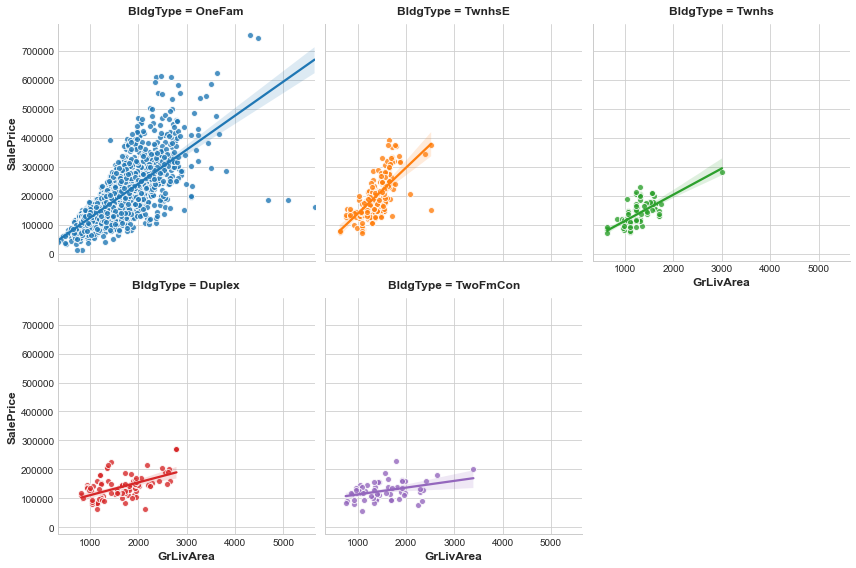

In [10]:
# GrLivArea와 결합 시도 --> 큰 변화를 감지. 이것으로 파생변수를 만들어 모델링하면 좋겠다는 아이디어 get
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)